# Distância e similaridade

Autor: João Vitor Pigozzo Quintã (jvpigozzo@gmail.com)


Esse notebook tem como objetivo explicitar os principais os conhecimentos base das técnicas de aprendizado não supervisionado     
    

# Preparação do ambiente

In [3]:
# Importação de pacotes
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math as math

# Modelo linear

Medidas de similaridade são componentes centrais usados por algoritmos de clusterização baseados em distância. Para iniciar o entendimento de similaridade o primeiro conceito utilizado será o modelo linear cujo objetivo é a avaliação de proximidade a partir de uma regra de três. Supondo a existência de filmes classificados (numa escala de 0 a 10) em comédia, drama e terror e usuários que classificam seus interesses por esses tópicos:

$$F1 = \begin{bmatrix} 10 \\ 7 \end{bmatrix} 
  F2 = \begin{bmatrix} 2 \\ 8 \end{bmatrix} $$

$$U1 = \begin{bmatrix} 10 \\ 0 \end{bmatrix} 
  U2 = \begin{bmatrix} 2 \\ 5 \end{bmatrix}$$

In [4]:
# Dicionários de filmes
f1 = {'comedia': 10, 'drama': 7}
f2 = {'comedia': 2,  'drama': 8}

# Dicionários de usuários
u1 = {'comedia': 10, 'drama': 0}
u2 = {'comedia': 2,  'drama': 7}

## Função de Similaridade

A função de similaridade será dada pelo produto das matrizes

$$
sim(f,u)=F^T*U
$$

In [5]:
# Definir a função de similaridade
def sim(f,u):
    
    #Produto
    prod = np.array(list(f.values()))*np.array(list(u.values()))
    
    #Somatório
    sim = sum(prod)
    
    return sim    

In [6]:
print(sim(f1,u1))
print(sim(f2,u1))
print(sim(f1,u2))
print(sim(f2,u2))

100
20
69
60


Analisando as matrizes de percebe-se que o usuário 1 gosta bastante de comédia e não possui nenhum gosto por filmes do gênero de drama. Analogamente, o filme 1 é capaz de entregar muita comédia e nada de terror enquanto o filme 2 entrega pouca comédia, e bastante em drama. Dessa forma, espera-se que o usurário 1 tenha maior propensão a gostar do filme 1 em detrimento do filme 2. Nesse modelo linear, obtemos como resultado que o unsuário 1 é mais similar ao filme 1 quando comparado com o filme 2.


## Distância Euclidiana

distância euclidiana é a distância entre dois pontos, que pode ser provada pela aplicação repetida do teorema de Pitágoras. Aplicando essa fórmula como distância, o espaço euclidiano torna-se um espaço métrico. A distância euclidiana entre os pontos ${\displaystyle P=(p_{1},p_{2},\dots ,p_{n})}$ e ${\displaystyle Q=(q_{1},q_{2},\dots ,q_{n}),}$ num espaço euclidiano n-dimensional, é definida como:

$\sqrt{(p_{1}-q_{1})^{2} + \dots + (p_{n}-q_{n})^{2}} =  \sqrt{\sum \limits _{i=1} ^{n} p_{i}-q_{i}}$

Vale ressaltar que diferentemente da função de similaridade, a distância é inversamente proporcional, isto é, quanto menor a distância mais parecidas são as observações.

### Interpretação Gráfica

Ainda no exemplo dos usuários e filmes, podemos calcular a distância euclidiana entre cada usuário e filme. A análise gráfica da distância euclidiana entre o usuário 1 e o filme 1 pode ser obtida por:

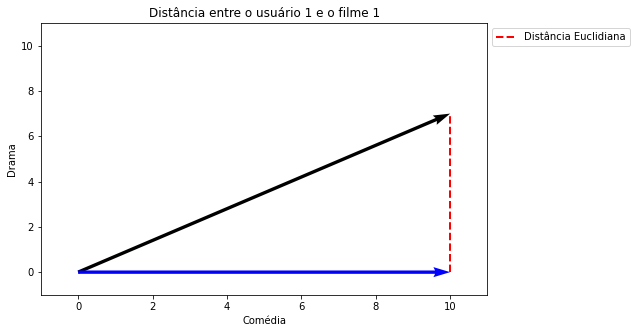

In [7]:
#Tamanho da figura
plt.rcParams['figure.figsize'] = (8, 5)

#Plot dos vetores
plt.quiver([0, 0], [0, 0], [u1['comedia'],f1['comedia']], [f1['drama'],u1['drama']], angles='xy', scale_units='xy', color=['black', 'blue'], scale=1)

#Limites dos eixos
plt.xlim(-1, 11)
plt.ylim(-1, 11)

#Titulos dos eixos
plt.xlabel("Comédia")
plt.ylabel("Drama")

#Distancia
plt.vlines(x=10, ymin=0, ymax=7, colors='red', ls='--', lw=2, label='Distância Euclidiana')

# place the legend outside
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Titulo
plt.title("Distância entre o usuário 1 e o filme 1")

#Display
plt.show()

Graficamente, percebebemos que o usuário 1 (representado pelo vetor azul) não possui nenhuma preferência por drama enquanto sua preferência por comédia é alta. O vetor de cor preta representa o filme 1 que é capaz de entregar 7 de drama e 10 de comédia.

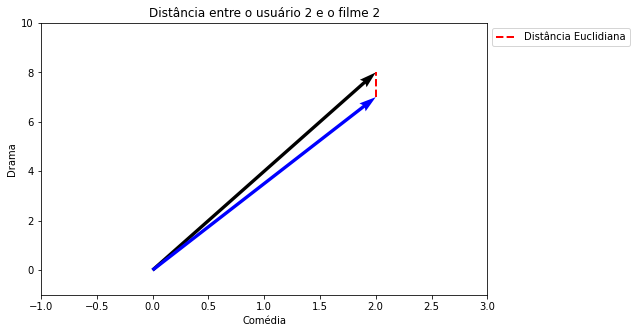

In [8]:
#Tamanho da figura
plt.rcParams['figure.figsize'] = (8, 5)

#Plot dos vetores
plt.quiver([0, 0], [0, 0], [u2['comedia'],f2['comedia']], [f2['drama'],u2['drama']], angles='xy', scale_units='xy', color=['black', 'blue'], scale=1)

#Limites dos eixos
plt.xlim(-1, 3)
plt.ylim(-1, 10)

#Titulos dos eixos
plt.xlabel("Comédia")
plt.ylabel("Drama")

#Distancia
plt.vlines(x=2, ymin=7, ymax=8, colors='red', ls='--', lw=2, label='Distância Euclidiana')

# place the legend outside
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Titulo
plt.title("Distância entre o usuário 2 e o filme 2")

#Display
plt.show()

O usuário 2 está bem próximo do filme 2. Esse resultado é esperado uma vez que o usuário 2 tem alta preferência por drama e pouca preferência por comédia enquanto o filme 2 entrega pouca comédia e muito drama. 

### Função de Distância Euclidiana

A função de distância euclidiana será dada pela fórmula da distância euclidiana

In [9]:
# Definir a função de distância euclidiana
def eucl(f,u):
    
    #Subtração
    sub = np.array(list(f.values()))-np.array(list(u.values()))    
    
    #Potencialização
    pot = sub**2
    
    #Raiz quadrada (distância)
    dist = math.sqrt(sum(pot))
    
    return dist    

In [10]:
print("{:.2f}".format(eucl(f1,u1)))
print("{:.2f}".format(eucl(f2,u1)))
print("{:.2f}".format(eucl(f1,u2)))
print("{:.2f}".format(eucl(f2,u2)))

7.00
11.31
8.00
1.00


A partir da distância euclidiana podemos inferir que o usuário 2 terá maior preferência pelo filme 2 enquanto o usuário 1 terá maior preferência pelo filme 1.

## Distância de Manhattan

A distância de Manhattan (“City Block” ou “Geometria do Táxi”) é uma forma de geometria em que a usual métrica da geometria euclidiana é substituída por uma nova métrica em que a distância entre dois pontos é a soma das diferenças absolutas de suas coordenadas. A distância de Manhattan é também conhecida como distância L1 ou norma L1. Portanto, a distância de Manhattan entre pontos ${\displaystyle P=(p_{1},p_{2},\dots ,p_{n})}$ e ${\displaystyle Q=(q_{1},q_{2},\dots ,q_{n}),}$ num espaço euclidiano n-dimensional, é definida como:

$  |p_{1}-q_{1}| + \dots + |p_{n}-q_{n}| = \sum \limits _{i=1} ^{n} {|p_{i}-q_{i}|} $

### Interpretação Gráfica

Ainda no exemplo dos usuários e filmes, podemos calcular a distância de Manhattan entre cada usuário e filme. A análise gráfica da distância de Manhattan entre o usuário 1 e o filme 1 pode ser obtida por:

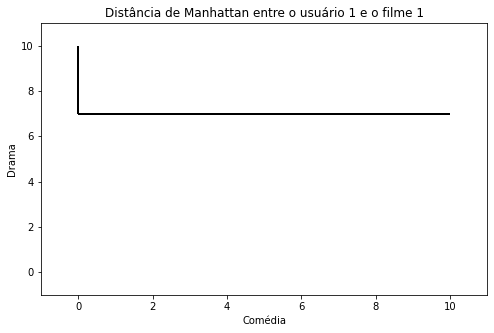

In [32]:
#Tamanho da figura
plt.rcParams['figure.figsize'] = (8, 5)

#Plot dos vetores
#plt.quiver([0, 0], [0, 0], [u1['comedia'],u1['drama']], [f1['comedia'],f1['drama']], angles='xy', scale_units='xy', color=['black', 'blue'], scale=1)

#Distancia
plt.vlines(x=u1['drama'], ymin=f1['drama'], ymax=u1['comedia'], colors='black', lw=2)
plt.hlines(y=f1['drama'], xmin=0, xmax=f1['comedia'], colors='black', lw=2)

#Limites dos eixos
plt.xlim(-1, 11)
plt.ylim(-1, 11)

#Titulos dos eixos
plt.xlabel("Comédia")
plt.ylabel("Drama")

#Titulo
plt.title("Distância de Manhattan entre o usuário 1 e o filme 1")

#Display
plt.show()

### Função de Distância de Manhattan

A função de distância de Manhattan será dada por

In [46]:
def manhattan(f, u):
    
    #Subtração
    sub = np.array(list(f.values()))-np.array(list(u.values()))    
    
    #Modulo
    modulo = abs(sub)    
    
    #Soma
    manhattan = sum(modulo)
    
    return manhattan 

In [47]:
print("{:.2f}".format(manhattan(f1,u1)))
print("{:.2f}".format(manhattan(f2,u1)))
print("{:.2f}".format(manhattan(f1,u2)))
print("{:.2f}".format(manhattan(f2,u2)))

7.00
16.00
8.00
1.00


A partir da distância de Manhattan temos um resultado igual ao obitido pela distância euclidiana no qual podemos inferir que o usuário 2 terá maior preferência pelo filme 2 enquanto o usuário 1 terá maior preferência pelo filme 1.

## Distância de Cosseno